In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

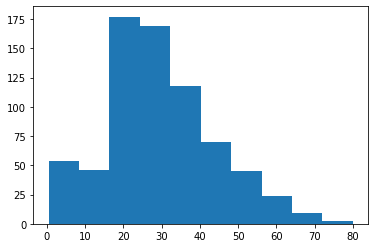

In [4]:
counts, bins = np.histogram(df["Age"].dropna())
plt.hist(bins[:-1], bins, weights=counts)

In [5]:
del df["Name"]
del df["Cabin"]
del df["Ticket"]
del df["Embarked"]
del df["Fare"]

In [6]:
df=pd.get_dummies(df,columns=["Sex"],drop_first=True)

In [7]:
del df["PassengerId"]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [8]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,-0.245489
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,1.000000


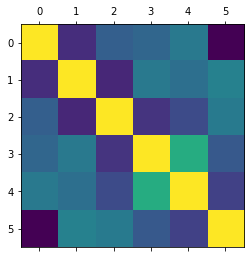

In [9]:
plt.matshow(df.corr())
plt.show()

In [10]:
from scipy.stats import pearsonr

In [11]:
df_clean = df[['Pclass', 'Age']].dropna()
pearsonr(df_clean['Pclass'], df_clean['Age'])

(-0.3692260153155172, 1.7566991549626533e-24)

In [12]:
df_clean = df[['Pclass', 'Survived']].dropna()
pearsonr(df_clean['Pclass'], df_clean['Survived'])

(-0.3384810359610153, 2.537047387978631e-25)

In [13]:
df_clean = df[['Parch', 'Age']].dropna()
pearsonr(df_clean['Parch'], df_clean['Age'])

(-0.18911926263203488, 3.5699493882872437e-07)

In [14]:
df_clean = df[['Parch', 'Survived']].dropna()
pearsonr(df_clean['Parch'], df_clean['Survived'])

(0.08162940708348379, 0.014799245374712763)

In [15]:
import math
def imputeNaN(df,feat_imp,feat_by):
    df[feat_imp+"_imputed"]=df[feat_imp]
    for i,inp in enumerate(df[feat_imp]):
        if math.isnan(inp):
            by_type=df[feat_by][i]
            df_temp=df.dropna().groupby(feat_by).sample(n=1)
            df[feat_imp+"_imputed"][i]=df_temp[feat_imp][df_temp[feat_by].index[list(df_temp[feat_by].values).index(by_type)]]
            

In [16]:
# testing for function
#df_temp=df.dropna().groupby("Pclass").sample(n=1)
#df_temp["Age"][np.where(df_temp["Pclass"]==1).index]
#df_temp["Age"][df_temp["Pclass"].index[list(df_temp["Pclass"].values).index(1)]]

In [17]:
imputeNaN(df,"Age","Pclass")

C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launc

C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launc

C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launc

C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fran\.conda\envs\general\lib\site-packages\ipykernel_launc

In [18]:
df.isnull().sum()

Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Sex_male         0
Age_imputed      0
dtype: int64

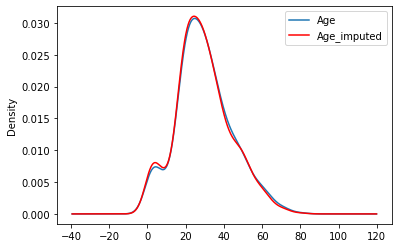

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_imputed.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [20]:
print(df['Age'].mean())
print(df['Age_imputed'].mean())

print(df['Age'].std())
print(df['Age_imputed'].std())

29.69911764705882
29.154511784511783
14.526497332334042
14.388235201205116


In [21]:
from scipy.stats import ttest_ind
ttest_ind(df['Age'].dropna(), df['Age_imputed'])

Ttest_indResult(statistic=0.7503571427795525, pvalue=0.4531497558113595)

In [22]:
def imputeNanRandom(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [23]:
imputeNanRandom(df,"Age")
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Age_imputed,Age_random
0,0,3,22.0,1,0,1,22.0,22.0
1,1,1,38.0,1,0,0,38.0,38.0
2,1,3,26.0,0,0,0,26.0,26.0
3,1,1,35.0,1,0,0,35.0,35.0
4,0,3,35.0,0,0,1,35.0,35.0
5,0,3,NaN,0,0,1,2.0,28.0
6,0,1,54.0,0,0,1,54.0,54.0
7,0,3,2.0,3,1,1,2.0,2.0
8,1,3,27.0,0,2,0,27.0,27.0
9,1,2,14.0,1,0,0,14.0,14.0


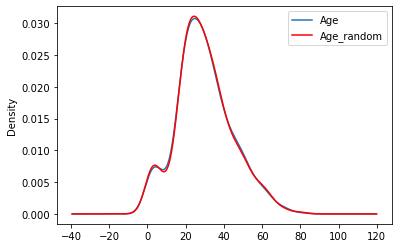

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
print(df['Age'].mean())
print(df['Age_imputed'].mean())
print(df["Age_random"].mean())
print()
print(df['Age'].std())
print(df['Age_imputed'].std())
print(df["Age_random"].std())

29.69911764705882
29.154511784511783
29.70034792368126

14.526497332334042
14.388235201205116
14.56365408956869


In [26]:
ttest_ind(df['Age'].dropna(), df['Age_random'])

Ttest_indResult(statistic=-0.001683742321121153, pvalue=0.9986567781347253)

In [29]:
df['Age_null']=np.where(df['Age'].isnull(),1,0)

In [34]:
df.tail()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Age_imputed,Age_random,Age_null
886,0,2,27.0,0,0,1,27.00,27.0,0
887,1,1,19.0,0,0,0,19.00,19.0,0
888,0,3,NaN,1,2,0,0.75,15.0,1
889,1,1,26.0,0,0,1,26.00,26.0,0
890,0,3,32.0,0,0,1,32.00,32.0,0


In [39]:
X=df[['Pclass','SibSp','Parch','Sex_male','Age_random','Age_null']]
y=df['Survived']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

accuracy:   0.764925


<AxesSubplot:>

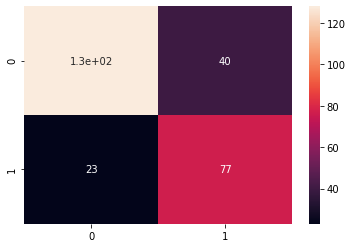

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns

model_nb=GaussianNB()

model_nb.fit(X_train, y_train)
pred = model_nb.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %f" % score)
cm = metrics.confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)